In [ ]:
#Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

In [2]:
df= pd.read_csv("C:/Users/Vijay Rathod/Downloads/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
## EDA checking 

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data=df.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MS'},axis=1)
data

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.duplicated().sum() ## there is no duplicates in given data

0

In [7]:
data.describe()

,RDS,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
## Correlation Matrix

In [9]:
data.corr()

,RDS,Admin,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


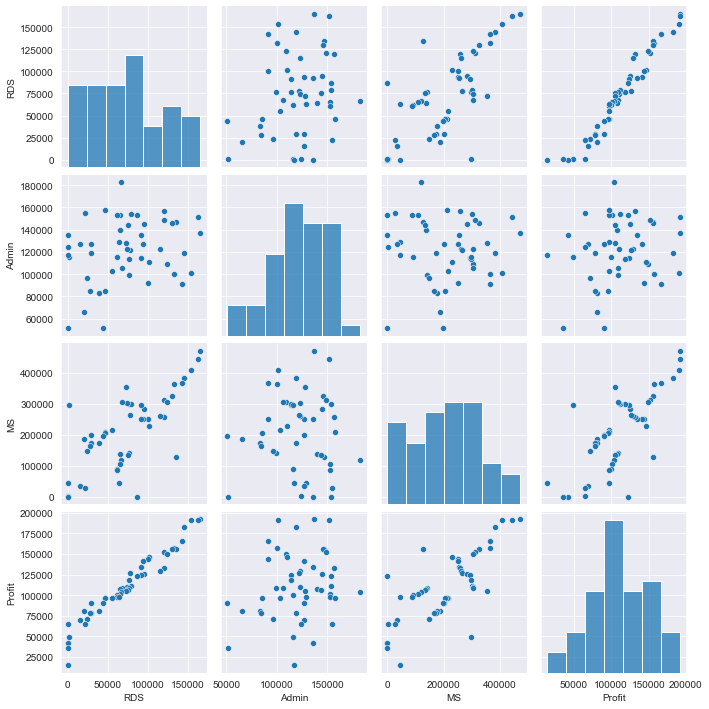

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [11]:
## Bulding Model

In [12]:
model1=smf.ols('Profit~RDS+Admin+MS',data=data).fit()

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        14:52:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
## Tvalues And Pvalues
model1.tvalues ,np.round(model1.pvalues,4)

(Intercept     7.626218
 RDS          17.846374
 Admin        -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.0000
 RDS          0.0000
 Admin        0.6018
 MS           0.1047
 dtype: float64)

In [15]:
# Finding rsquared values
model1.rsquared , model1.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [16]:
# Build SLR and MLR models for insignificant variables 'Admin' and 'MS'
slr_Admin=smf.ols('Profit~Admin',data=data).fit()
slr_Admin.summary()     #### Admin have insignificant P_value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.162
Time:                        14:52:23   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
slr_MS=smf.ols('Profit~MS',data=data).fit()
slr_MS.summary()     ### MS have significant P_value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.38e-10
Time:                        14:52:23   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mlr=smf.ols('Profit~Admin+MS',data=data).fit()
mlr.summary()  ## Admin and MS have siginificant values.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.50e-10
Time:                        14:52:23   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
##  Model Validation

In [20]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols("RDS~Admin+MS",data=data).fit().rsquared
VIF_r=1/(1-rsq_r)
rsq_Admin=smf.ols('Admin~RDS+MS',data=data).fit().rsquared
VIF_admin=1/(1-rsq_Admin)
rsq_MS=smf.ols('MS~RDS+Admin',data=data).fit().rsquared
VIF_ms=1/(1-rsq_MS)
## storing vall VIF values in data frame
df1={'Variables':['RDS','Admin','MS'],'VIF':[VIF_r,VIF_admin,VIF_ms]}
VIF_frame=pd.DataFrame(df1)
VIF_frame

,Variables,VIF
0,RDS,2.468903
1,Admin,1.175091
2,MS,2.326773


In [21]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


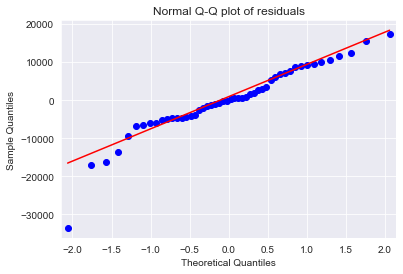

In [22]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

In [24]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std() 

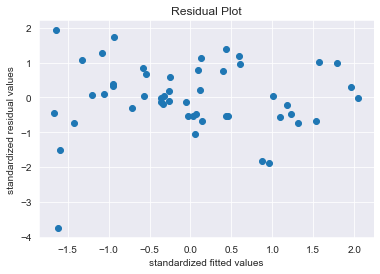

In [25]:
plt.scatter(standard_values(model1.fittedvalues),standard_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [26]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

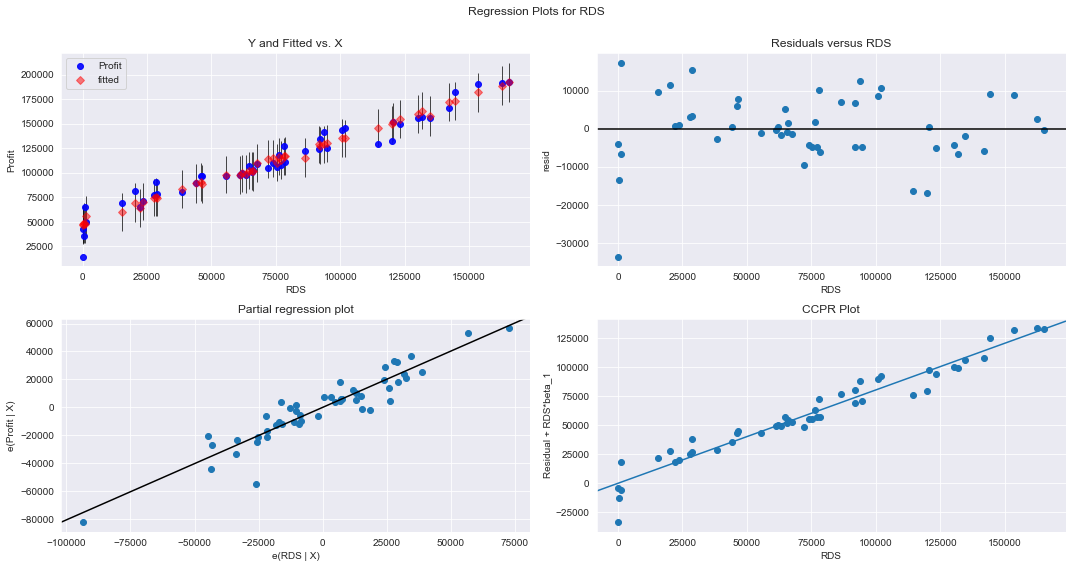

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,"RDS",fig=fig)
plt.show()

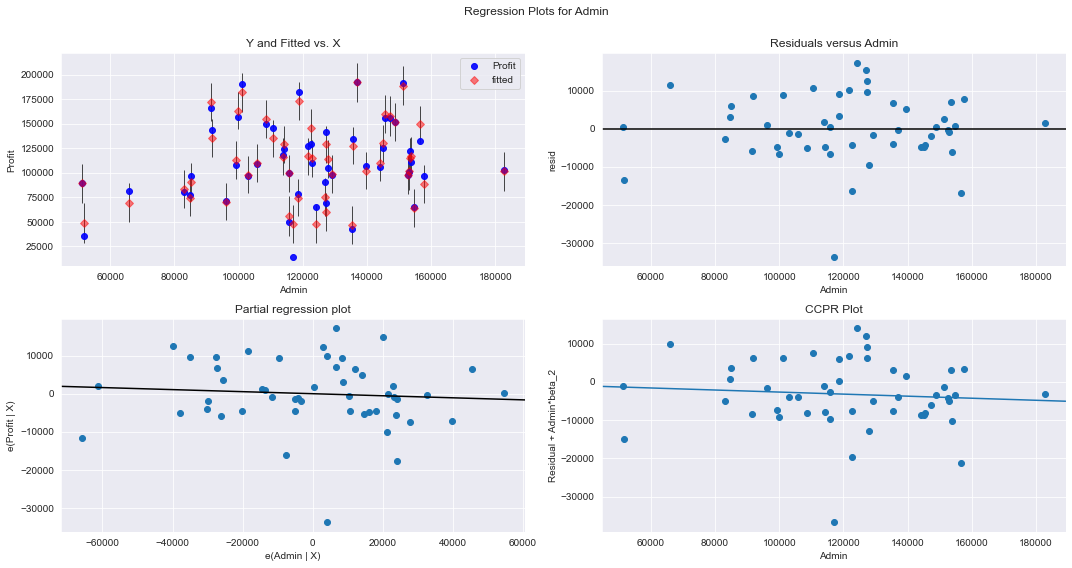

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,"Admin",fig=fig)
plt.show()

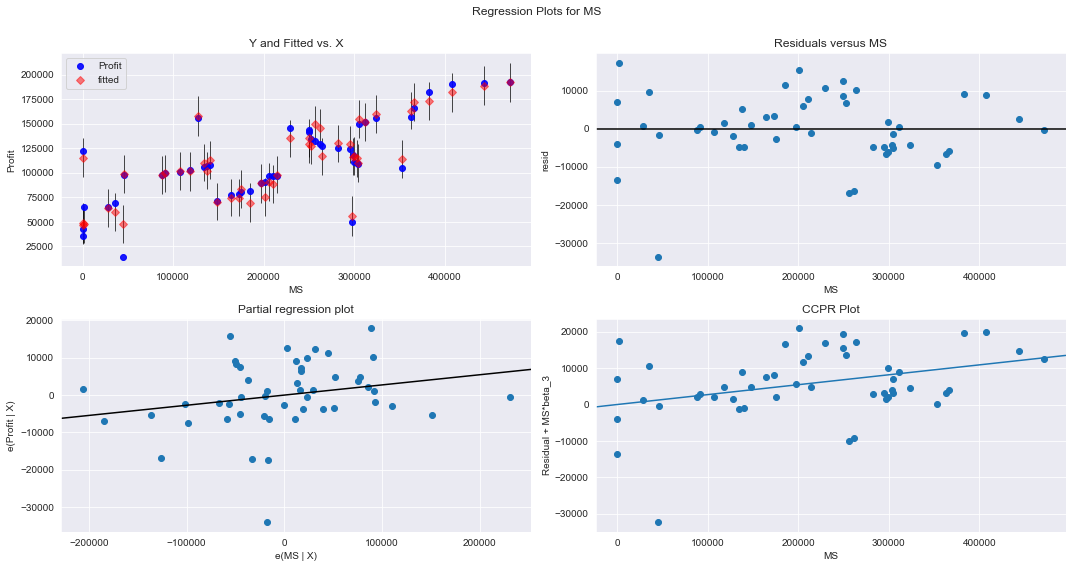

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,"MS",fig=fig)
plt.show()

In [30]:
 ## Model Deletion Diagnostics (checking Outliers or Influencers)

In [31]:
(c,_)=model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

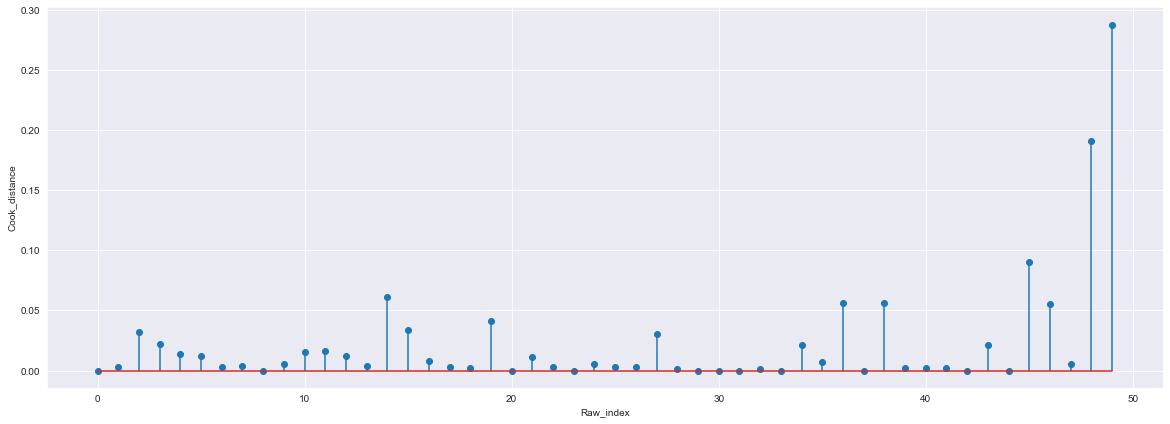

In [32]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [33]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543267)

In [34]:
data[data.index.isin([49])]

,RDS,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [35]:
####   Improving the Model

In [36]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1.head()

,RDS,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
### Bulding Model for our imporved data set
model2=smf.ols('Profit~RDS+Admin+MS',data=data1).fit()
model2.summary() ### since our P_value for Admin & MS is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.85e-32
Time:                        14:52:28   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Finding rsquared values
model2.rsquared , model2.rsquared_adj  # Model accuracy is 95.87%

(0.9613162435129847, 0.9587373264138503)

In [39]:
###Detecting Influencers
(c,_)=model2.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

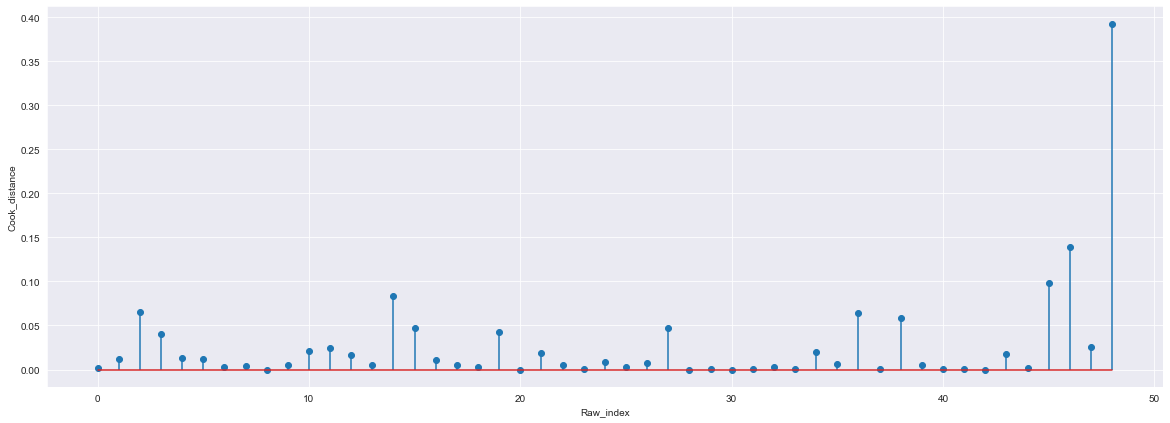

In [40]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [41]:
(np.argmax(c), np.max(c))

(48, 0.3927442055632118)

In [42]:
data1[data1.index.isin([48])]

,RDS,Admin,MS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [43]:
data2=data1.drop(data1.index[[48]],axis=0).reset_index()
data2.head()

,index,RDS,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
### Bulding Model for our imporved data set
model3=smf.ols('Profit~RDS+Admin+MS',data=data2).fit()
model3.summary()  ####### since our P_value for Admin & MS is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.03e-31
Time:                        14:52:29   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
Admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Finding rsquared values
model3.rsquared , model3.rsquared_adj  # Model accuracy is 96.26%

(0.9626766170294073, 0.960131840917776)

In [46]:
###Detecting Influencers
(c,_)=model3.get_influence().cooks_distance
c

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

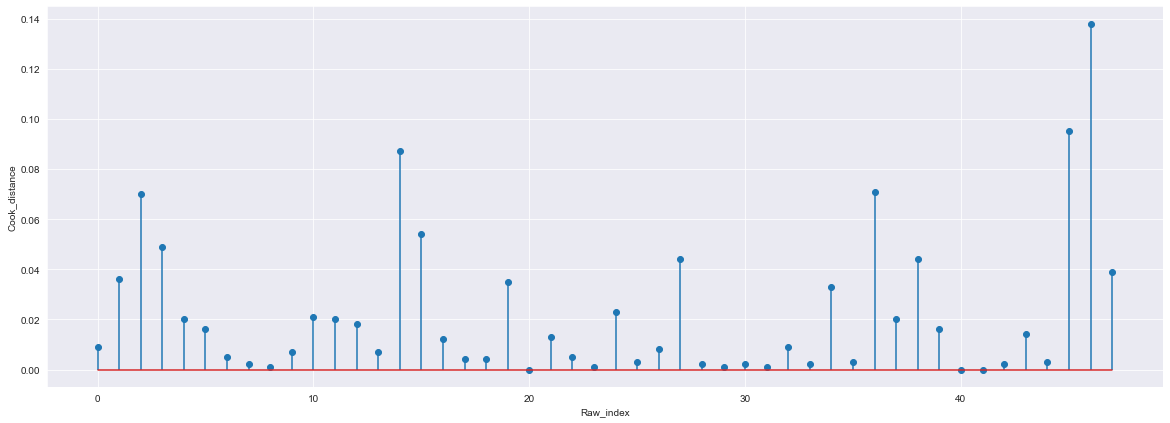

In [47]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [48]:
(np.argmax(c), np.max(c))

(46, 0.13829133994334533)

In [49]:
data2[data2.index.isin([45,46])]

,index,RDS,Admin,MS,State,Profit
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,46,1315.46,115816.21,297114.46,Florida,49490.75


In [50]:
data3=data2.drop(data2.index[[45,46]],axis=0).reset_index()
data3.head()

,level_0,index,RDS,Admin,MS,State,Profit
0,0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
### Bulding Model for our imporved data set
model4=smf.ols('Profit~RDS+Admin+MS',data=data3).fit()
model4.summary()  ####### since our P_value for Admin & MS is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           5.56e-30
Time:                        14:52:31   Log-Likelihood:                -471.03
No. Observations:                  46   AIC:                             950.1
Df Residuals:                      42   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.69e+04   5788.198      9.830      0.000    4.52e+04    6.86e+04
RDS            0.7714      0.040     19.320      0.000       0.691       0.852
Admin         -0.0540      0.043     -1.254      0.217      -0.141       0.033
MS             0.0277      0.014      1.916      0.062      -0.001       0.057
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Finding rsquared values
model4.rsquared , model4.rsquared_adj  # Model accuracy is 95.99%

(0.962593650298269, 0.9599217681767168)

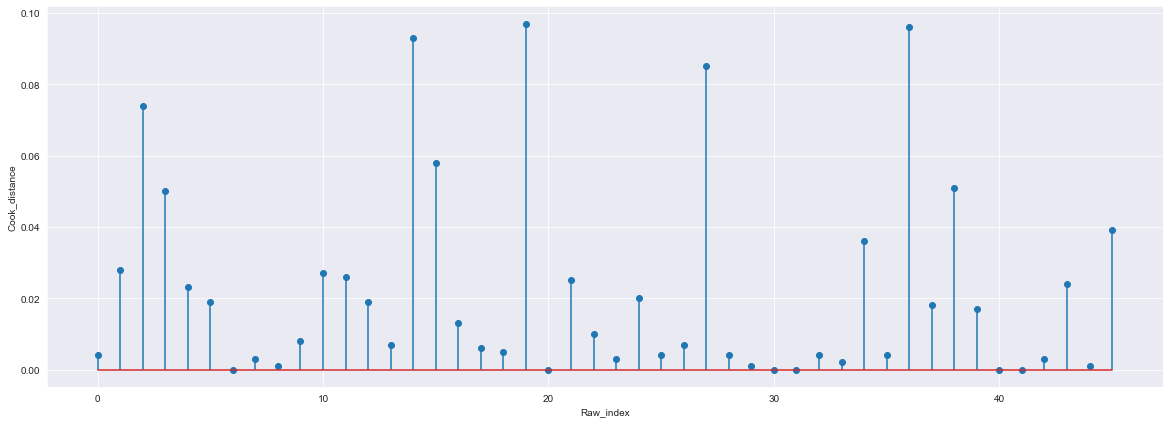

In [53]:
###Detecting Influencers
(c,_)=model4.get_influence().cooks_distance
c
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [54]:
(np.argmax(c), np.max(c))

(19, 0.09705035449314824)

In [55]:
data3[data3.index.isin([19])]


,level_0,index,RDS,Admin,MS,State,Profit
19,19,19,86419.7,153514.11,0.0,New York,122776.86


In [56]:
data4=data3.drop(data3.index[[19]],axis=0)
data4.drop('level_0',axis=1).head()

,index,RDS,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
### Bulding Model for our imporved data set
model5=smf.ols('Profit~RDS+Admin+MS',data=data4).fit()
model5.summary()  ####### since our P_value for Admin  is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     364.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.41e-29
Time:                        14:52:32   Log-Likelihood:                -460.51
No. Observations:                  45   AIC:                             929.0
Df Residuals:                      41   BIC:                             936.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.618e+04   5789.145      9.704      0.000    4.45e+04    6.79e+04
RDS            0.7549      0.042     17.952      0.000       0.670       0.840
Admin         -0.0533      0.043     -1.245      0.220      -0.140       0.033
MS             0.0356      0.016      2.251      0.030       0.004       0.068
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.311
Skew:                          -0.042   Prob(JB):                        0.856
Kurtosis:                       2.602   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# Finding rsquared values
model5.rsquared , model5.rsquared_adj  # Model accuracy is 96.12%

(0.9638487279209415, 0.9612035128907664)

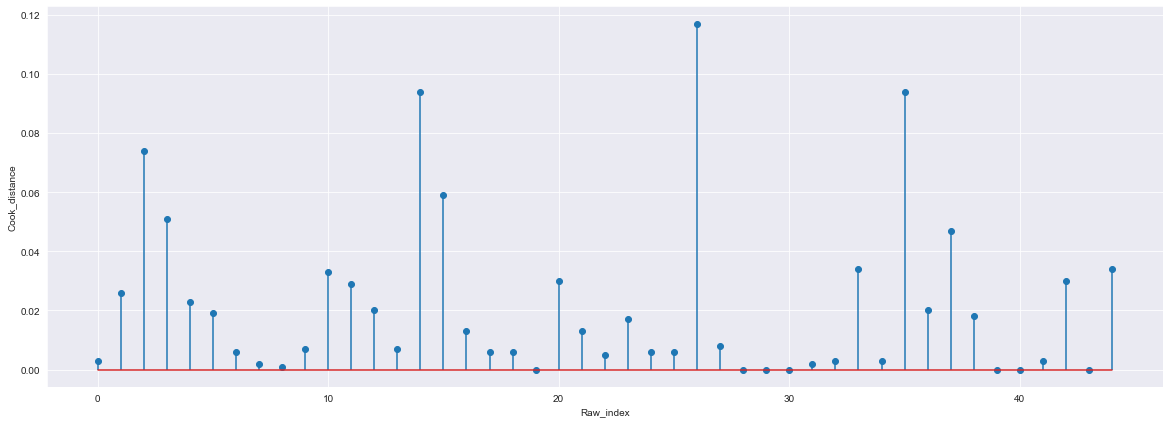

In [59]:
###Detecting Influencers
(c,_)=model5.get_influence().cooks_distance
c
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [60]:
(np.argmax(c), np.max(c))

(26, 0.11730559428099194)

In [61]:
data5=data4.drop(data4.index[[15,26,32]],axis=0)
data5.drop('level_0',axis=1).head()

,index,RDS,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [62]:
### Bulding Model for our imporved data set
model6=smf.ols('Profit~RDS+Admin+MS',data=data5).fit()
model6.summary()  ####### since our P_value for Admin is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     420.8
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           3.49e-29
Time:                        14:52:33   Log-Likelihood:                -426.50
No. Observations:                  42   AIC:                             861.0
Df Residuals:                      38   BIC:                             868.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.544e+04   5477.362     10.122      0.000    4.44e+04    6.65e+04
RDS            0.7443      0.041     17.991      0.000       0.661       0.828
Admin         -0.0475      0.040     -1.176      0.247      -0.129       0.034
MS             0.0427      0.016      2.728      0.010       0.011       0.074
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.521
Skew:                           0.056   Prob(JB):                        0.771
Kurtosis:                       2.466   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Finding rsquared values
model6.rsquared , model6.rsquared_adj  # Model accuracy is 96.84%

(0.9707763108204028, 0.9684691774641189)

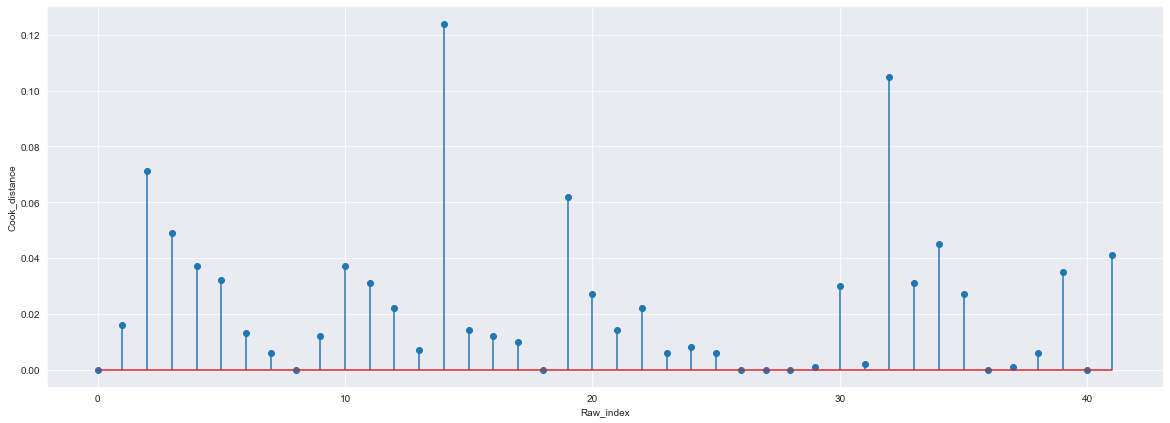

In [64]:
###Detecting Influencers
(c,_)=model6.get_influence().cooks_distance
c
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [65]:
(np.argmax(c), np.max(c))

(14, 0.12387644448375676)

In [66]:
data6=data5.drop(data5.index[[14]],axis=0)
data6.drop('level_0',axis=1).head()

,index,RDS,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
### Bulding Model for our imporved data set
model7=smf.ols('Profit~RDS+Admin+MS',data=data6).fit()
model7.summary()  ####### since our P_value for Admin is high we redo cook_distance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     489.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.14e-30
Time:                        14:52:35   Log-Likelihood:                -413.21
No. Observations:                  41   AIC:                             834.4
Df Residuals:                      37   BIC:                             841.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.365e+04   5124.215     10.469      0.000    4.33e+04     6.4e+04
RDS            0.7551      0.039     19.571      0.000       0.677       0.833
Admin         -0.0334      0.038     -0.881      0.384      -0.110       0.043
MS             0.0409      0.015      2.815      0.008       0.011       0.070
==============================================================================
Omnibus:                        5.226   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.757
Skew:                           0.393   Prob(JB):                        0.252
Kurtosis:                       2.002   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Finding rsquared values
model7.rsquared , model7.rsquared_adj  # Model accuracy is 97.344%

(0.9754339830558235, 0.9734421438441335)

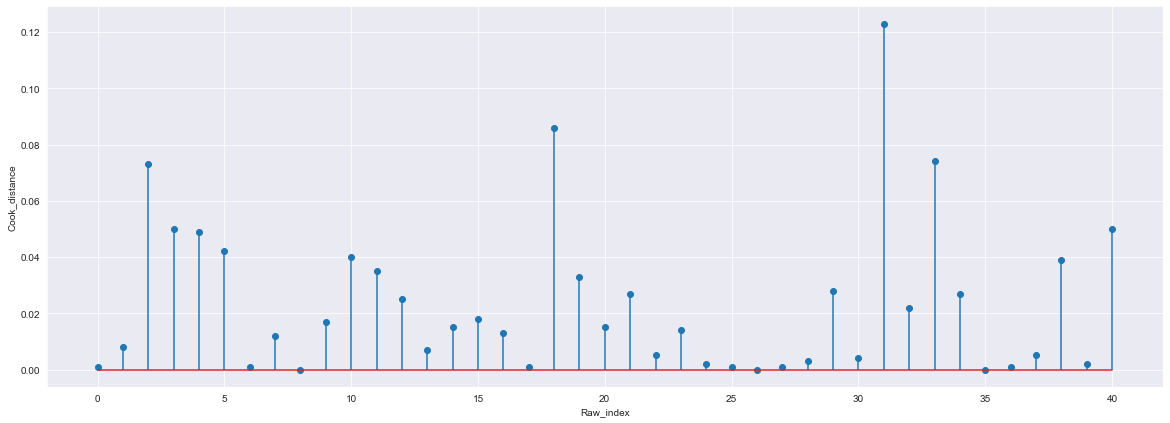

In [69]:
###Detecting Influencers
(c,_)=model7.get_influence().cooks_distance
c
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data6)),np.round(c,3))
plt.xlabel('Raw_index')
plt.ylabel('Cook_distance')
plt.show()

In [70]:
(np.argmax(c), np.max(c))

(31, 0.12349519790730294)

In [71]:
data7=data6.drop(data6.index[[31]],axis=0)
data7.drop('level_0',axis=1).head()

,index,RDS,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
model8=smf.ols('Profit~RDS+Admin+MS',data=data7).fit()
model8.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     527.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.52e-30
Time:                        14:52:36   Log-Likelihood:                -401.34
No. Observations:                  40   AIC:                             810.7
Df Residuals:                      36   BIC:                             817.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.435e+04   4918.649     11.049      0.000    4.44e+04    6.43e+04
RDS            0.7788      0.039     20.145      0.000       0.700       0.857
Admin         -0.0445      0.037     -1.214      0.233      -0.119       0.030
MS             0.0341      0.014      2.381      0.023       0.005       0.063
==============================================================================
Omnibus:                        5.902   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                2.774
Skew:                           0.371   Prob(JB):                        0.250
Kurtosis:                       1.945   Cond. No.                     1.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Finding rsquared values
model8.rsquared , model8.rsquared_adj  # Model accuracy is 97.59%

(0.9777672009547774, 0.9759144677010089)

In [ ]:
## from all above Model "Model8" has very high Accuracy(97.59%) and very Low AIC(810)
## so we consider it as our Final Model.

In [101]:
##New Model Predictions
# say New data for prediction is
new_data=pd.DataFrame({'RDS':50000,"Admin":80000,"MS":100000},index=[0])
new_data

,RDS,Admin,MS
0,50000,80000,100000


In [102]:
# Manual Predictions of Price
model8.predict(new_data)

0    93133.34267
dtype: float64

In [103]:
# Automatic Prediction of Price with 97.59% accurcy
pred_y=model8.predict(data)
pred_y

0     173429.228371
1     164974.476563
2     160382.675937
3     152225.345211
4     155955.252258
5     128570.276167
6     131238.534445
7     130769.253563
8     118843.047821
9     112620.074655
10    114719.844112
11    103198.406596
12    111166.314470
13    101686.142854
14    102280.989624
15    100586.691040
16     98170.427141
17     99549.037440
18    100292.780649
19     90669.454222
20     93400.440833
21     93099.228849
22     86646.044901
23     77353.440777
24     77904.112470
25     73520.796956
26     65695.568934
dtype: float64

In [104]:
##R^2 value for each prepared model
d={'Prep_Models':['Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8'],'Rsquared':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared]}
table=pd.DataFrame(d)
table

,Prep_Models,Rsquared
0,Model1,0.950746
1,Model2,0.990667
2,Model3,0.962677
3,Model4,0.962594
4,Model5,0.963849
5,Model6,0.970776
6,Model7,0.975434
7,Model8,0.977767
